<a href="https://colab.research.google.com/github/nikhil42023/AI-ML/blob/main/RL_2105A42023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

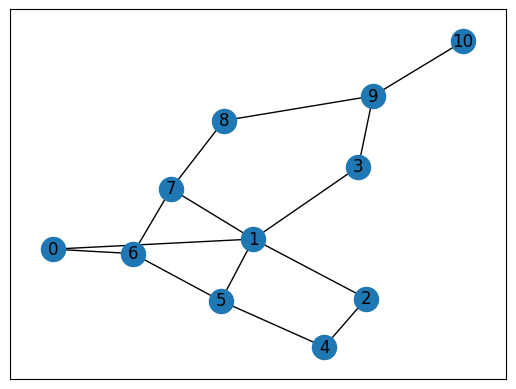

In [ ]:
import numpy as np
import pylab as pl
import networkx as nx
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
(1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
(8, 9), (7, 8), (1, 7), (3, 9)]
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

In [ ]:
import numpy as np

MATRIX_SIZE = 11
M = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1
goal = 10  # Assuming goal is defined somewhere in your code

points = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
          (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
          (8, 9), (7, 8), (1, 7), (3, 9)]

for point in points:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]] = 0

# Setting the goal
M[goal, goal] = 100
print(M)



(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


In [1]:
import numpy as np

MATRIX_SIZE = 11
M = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

point = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
         (8, 9), (7, 8), (1, 7), (3, 9)]

for p in point:
    if p[1] == 10:
        M[p] = 100
    else:
        M[p] = 0
    if p[0] == 10:
        M[p[::-1]] = 100
    else:
        M[p[::-1]] = 0

goal = 10
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gamma = 0.75
initial_state = 1

def available_actions(state):
    current_state_row = M[state,]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_actions_range, 1)[0])  # Explicitly extract a single element
    return next_action

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1)[0])  # Explicitly extract a single element
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    if np.max(Q) > 0:
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)



<ipython-input-8-e3611478260c>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)
<ipython-input-9-a72b1838e536>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)


Most efficient path:
[0, 1, 3, 9, 10]


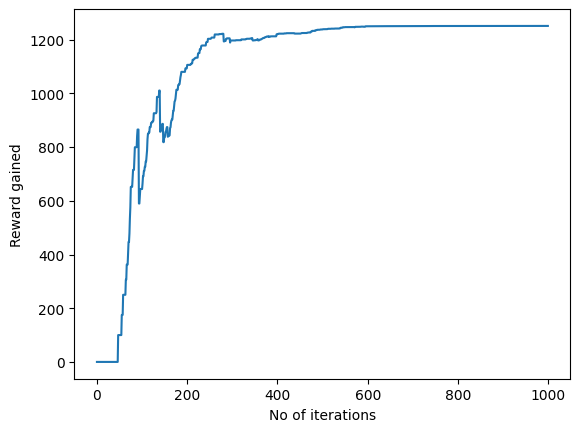

In [ ]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

# Testing
current_state = 0
steps = [current_state]
while current_state != 10:
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

# Plotting scores
import matplotlib.pyplot as plt

plt.plot(scores)
plt.xlabel('No of iterations')
plt.ylabel('Reward gained')
plt.show()
